In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [16]:
df = pd.read_csv("HR_comma_sep.csv")
df.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
9884,0.91,0.83,4,235,3,0,0,0,technical,low
12258,0.88,0.88,5,232,5,1,1,0,accounting,medium
10037,0.43,0.84,2,285,5,0,0,0,technical,low
7180,0.52,0.74,4,174,3,0,0,0,technical,medium
9950,0.75,0.41,5,196,4,0,0,0,sales,low
1864,0.37,0.50,2,154,3,0,1,0,hr,medium
7156,0.81,0.78,3,166,2,0,0,0,support,low
7319,0.81,0.95,3,204,2,0,0,0,product_mng,low
10891,0.80,0.55,4,178,2,1,0,0,support,low
10146,0.49,0.52,3,168,3,0,0,0,IT,medium


<BarContainer object of 14999 artists>

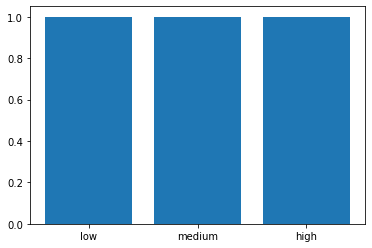

In [15]:
plt.bar(df.salary, df.left)

<BarContainer object of 14999 artists>

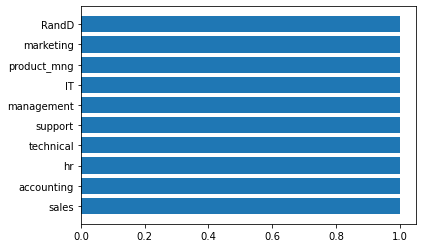

In [25]:
plt.barh(df.Department, df.left)

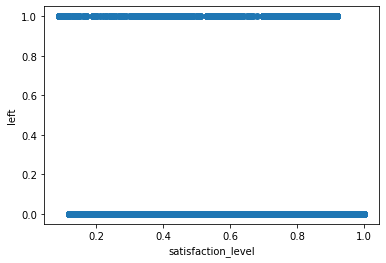

In [22]:
plt.xlabel("satisfaction_level")
plt.ylabel("left")
plt.scatter(df.satisfaction_level, df.left)

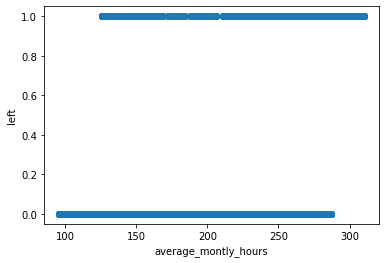

In [21]:
plt.xlabel("average_montly_hours")
plt.ylabel("left")
plt.scatter(df.average_montly_hours, df.left)

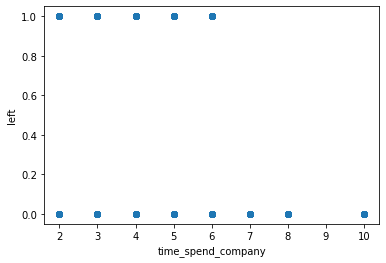

In [26]:
plt.xlabel("time_spend_company")
plt.ylabel("left")
plt.scatter(df.time_spend_company, df.left)

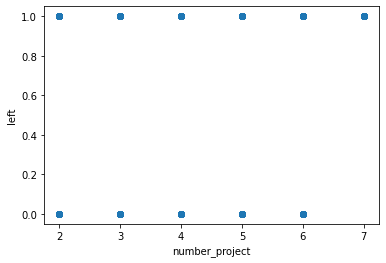

In [28]:
plt.xlabel("number_project")
plt.ylabel("left")
plt.scatter(df.number_project, df.left)

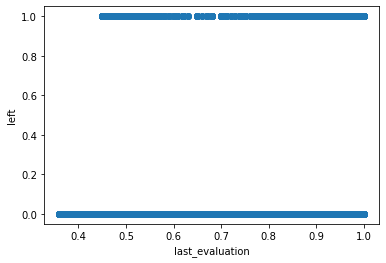

In [32]:
plt.xlabel("last_evaluation")
plt.ylabel("left")
plt.scatter(df.last_evaluation, df.left)

Text(0.5, 1.0, 'Scatter Plot of Retained and Not Retained Employees')

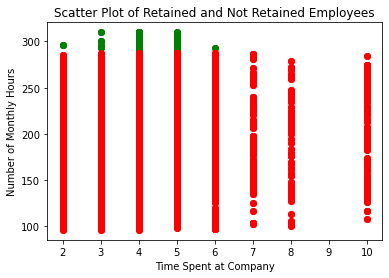

In [30]:
retained = df[df.left == 1]
not_retained = df[df.left == 0]

# Scatter plot
plt.scatter(retained['time_spend_company'], retained['average_montly_hours'], label='Retained', color='green')
plt.scatter(not_retained['time_spend_company'], not_retained['average_montly_hours'], label='Not Retained', color='red')

# Labels and Title
plt.xlabel('Time Spent at Company')
plt.ylabel('Number of Monthly Hours')
plt.title('Scatter Plot of Retained and Not Retained Employees')

<Figure size 576x432 with 0 Axes>

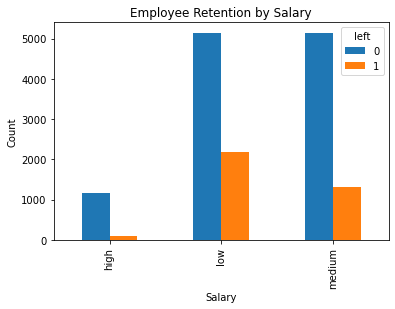

In [89]:
plt.figure(figsize=(8, 6))
pd.crosstab(df['salary'], df['left']).plot(kind='bar')
plt.title('Employee Retention by Salary')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Count')

<Figure size 576x432 with 0 Axes>

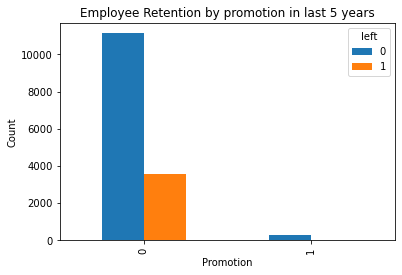

In [91]:
plt.figure(figsize=(8, 6))
pd.crosstab(df['promotion_last_5years'], df['left']).plot(kind='bar')
plt.title("Employee Retention by promotion in last 5 years")
plt.xlabel('Promotion')
plt.ylabel('Count')

In [ ]:
# features = [satisfaction_level, average_montly_hours, salary, promotion_last_5years]

In [33]:
salary_dummies = pd.get_dummies(df[['salary']])
salary_dummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [53]:
merged = pd.concat([df, salary_dummies], axis='columns')
merged.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_high,salary_low,salary_medium
44,0.09,0.89,6,276,4,0,1,0,technical,low,0,1,0
11116,0.60,0.79,4,262,3,0,0,0,sales,low,0,1,0
7044,0.70,0.48,4,237,3,0,0,0,sales,low,0,1,0
14587,0.56,0.71,4,296,2,0,1,0,IT,medium,0,0,1
7510,0.96,0.72,4,228,2,0,0,0,accounting,high,1,0,0
2011,0.34,0.39,2,136,3,0,0,0,sales,medium,0,0,1
11954,0.82,0.79,3,160,3,0,0,0,sales,medium,0,0,1
10596,0.20,0.97,4,237,5,0,0,0,IT,medium,0,0,1
4432,0.65,0.60,5,160,3,0,0,0,technical,medium,0,0,1
11455,0.63,0.48,4,179,3,0,0,0,marketing,low,0,1,0


In [92]:
X = merged[['satisfaction_level', 'average_montly_hours', 'salary_high', 'salary_low', 'promotion_last_5years']]
X.sample(10)

,satisfaction_level,average_montly_hours,salary_high,salary_low,promotion_last_5years
12603,0.83,245,0,1,0
12269,0.38,139,0,0,0
14895,0.43,129,0,0,0
2945,0.72,197,0,1,0
13786,0.49,192,1,0,0
1087,0.73,273,0,1,0
13191,0.77,273,1,0,0
141,0.45,155,0,1,0
11309,0.55,158,0,1,0
8824,0.61,271,0,1,0


In [93]:
y = merged[['left']]
y.sample(10)

,left
3777,0
4353,0
13936,0
2703,0
8753,0
12824,0
8802,0
9302,0
3314,0
8561,0


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [95]:
len(X_train)

10499

In [96]:
len(X_test)

4500

In [97]:
model = linear_model.LogisticRegression()

In [98]:
model.fit(X_train, y_train)

C:\Users\Priyansh\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [99]:
y_predicted = model.predict(X_test)
y_predicted[10:30]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      dtype=int64)

In [100]:
y_test[10:30]

,left
14908,1
13252,0
90,1
5941,0
2590,0
13447,0
5162,0
11045,0
13854,0
10279,0


In [101]:
model.score(X_test, y_test)

0.766